# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## BEGINNER LEVEL TASK

### Task 3 -Music recommender system

Music recommender system can suggest songs to users based on their listening pattern.

Datasetlinks https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

# Importing libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASETS

In [62]:
ntr = 7000
nts = 3000
data_path = r"/Users/reginoldkbinoy/Desktop/kkbox-music-recommendation-challenge/train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"/Users/reginoldkbinoy/Desktop/kkbox-music-recommendation-challenge/songs.csv")
members = pd.read_csv(r"/Users/reginoldkbinoy/Desktop/kkbox-music-recommendation-challenge/members.csv")

In [ ]:
train.head(10)

In [ ]:
train.sample(10)

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train.describe()

In [ ]:
train.info()

In [ ]:
train.isnull().sum()


In [63]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [64]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1978475,TQCdPrkxmLANxfuZCwGkcaHDGbCcTYqeyAoH5mNJLhs=,276897,921,フェニックス2～「ガイアの夜明け」「カンブリア宮殿」「未来世紀ジパング」他サウンドトラック,岸利至,NaN,17.0
62857,aQY0pPqOj0WENvrMXinNCZeByNMRPxAGEMqpH30qsGE=,391836,1609,Marc Van Linden & Chris Avedon,NaN,NaN,-1.0
1890216,gjtqwrQiCzcyLvHSuq3RTrm6ifcIsOlg3TLMg4Imdgw=,319843,1152,Yela,Daffon Yela Marie-christine / Corea Amadou Fra...,NaN,-1.0
1959441,ch1yoOVXPbKwv4WFr+3nxtJNRG3r30h8g8q6TAskCUI=,221727,921,Magic Piano,NaN,NaN,-1.0
2036159,jdWQ67K438f8BJyG58tZR5X09QJdQFMBDkw2XagkVBY=,237679,921,Illényi Katica,NaN,NaN,52.0
1302446,1nGTEbAGsV4ua9fTLdl4iQwDt4DrbcdQWUycdOEg6rg=,260832,2022,Youth Group,NaN,NaN,52.0
320800,GPEWkdqc7nQExxWOfVA7Ip5rOhmhz2Van/t9/jJQXoY=,212453,465,Gabrielle Aplin,NaN,NaN,52.0
64588,XyxmkTNiEUrnsKd4Ffw00QeDs6uy2qKuGtOjQar+2wo=,257602,921,Various Artists,陳暉宜,天樂,3.0
2125840,xfYvou+WqbxZUM+5uIcFuqf58sTkecQrkfyEQQbcow0=,215180,958,Yo-Yo Ma,Johann Sebastian Bach,NaN,-1.0
140278,bVJCYTI+GbmZ2K0OmqzOl2hIhPgBjsS4O6TbY6L8kMU=,324336,465,The Whitest Boy Alive,NaN,NaN,52.0


In [65]:
songs.shape

(2296320, 7)

In [66]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [67]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [68]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [69]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071358
lyricist       1945306
language             1
dtype: int64

In [ ]:
members.head(10)

In [70]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
5760,sg4TCsqAgrjfucnKL5Vn8m2o7ldIokUodlxtbBDeQ18=,22,29,male,9,20080320,20170122
32046,NqZbjC+9HHEZ412bT/9CVPHKVKxggNFPTrgcuIljvME=,13,30,female,9,20110422,20180228
31288,nNusrMamb2anWvtwWJGGTXHxZGoYoigd/LrZ6F1ajhs=,1,0,NaN,7,20160604,20171003
6022,XIlI9fcs7j+zabQSLMRAVgMvz4Tu4rZYsVFDybrBABM=,4,0,NaN,4,20160405,20170712
9346,TXW7pQhCSfh5gUnTWijOmfaWChMGhIS/56zgGPEF2tw=,1,0,NaN,4,20170223,20170226
33511,BXU94hYDsOXdGtKcvyHGrbsPEQImGeX5BMiUWtPB7Pc=,1,0,NaN,4,20161127,20161204
13765,IwHsMxDO1hxikcrqnxS/Vkwl+K38WybGOwW2ktFg1F0=,11,0,NaN,9,20160608,20171007
11785,PHyoTgjjLzZX0SrPyTEOXb1PsIKJvVuIZePCvjC6+TM=,4,0,NaN,3,20140131,20170907
9519,l8r5s1W/iTPlGRxMXJDl0aZAk9suTgtodRrbXN8Xly4=,4,31,female,7,20111222,20170717
18676,JYaISdpDrWplrfOpSsl6iMh7oA9zCwEUxrm79fnz+fg=,8,19,male,4,20160315,20170610


In [71]:
members.shape

(34403, 7)

In [72]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [73]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [74]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [75]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# DATA VISUALIZATION

<Axes: xlabel='source_system_tab', ylabel='count'>

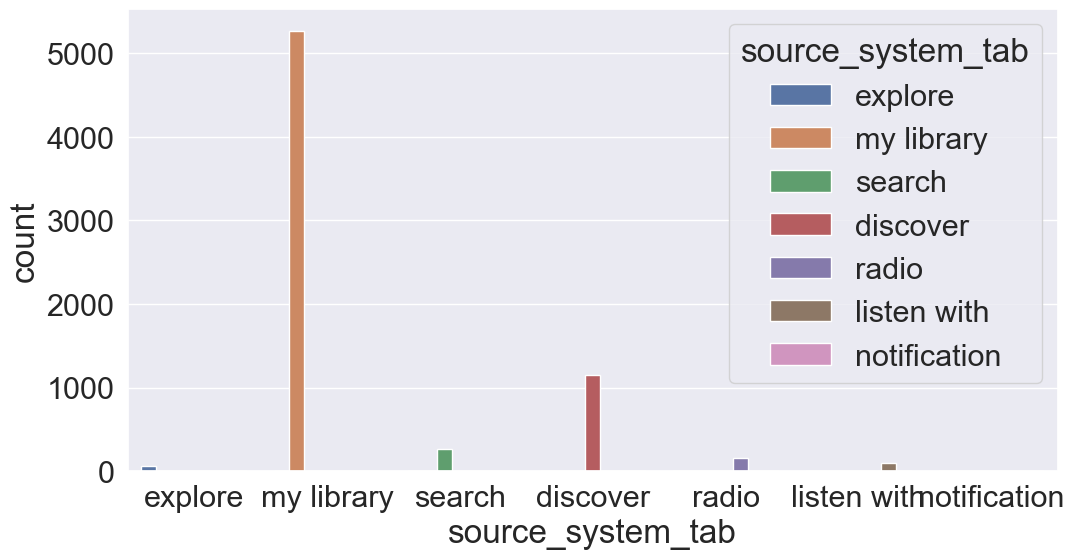

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

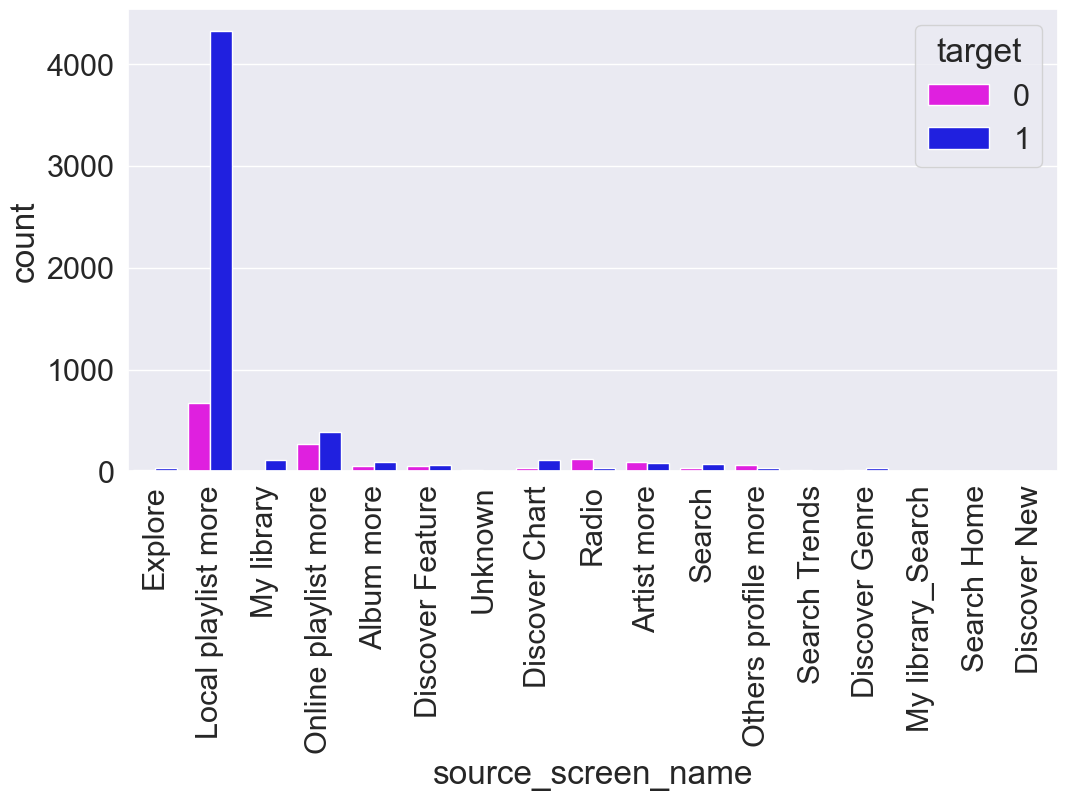

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

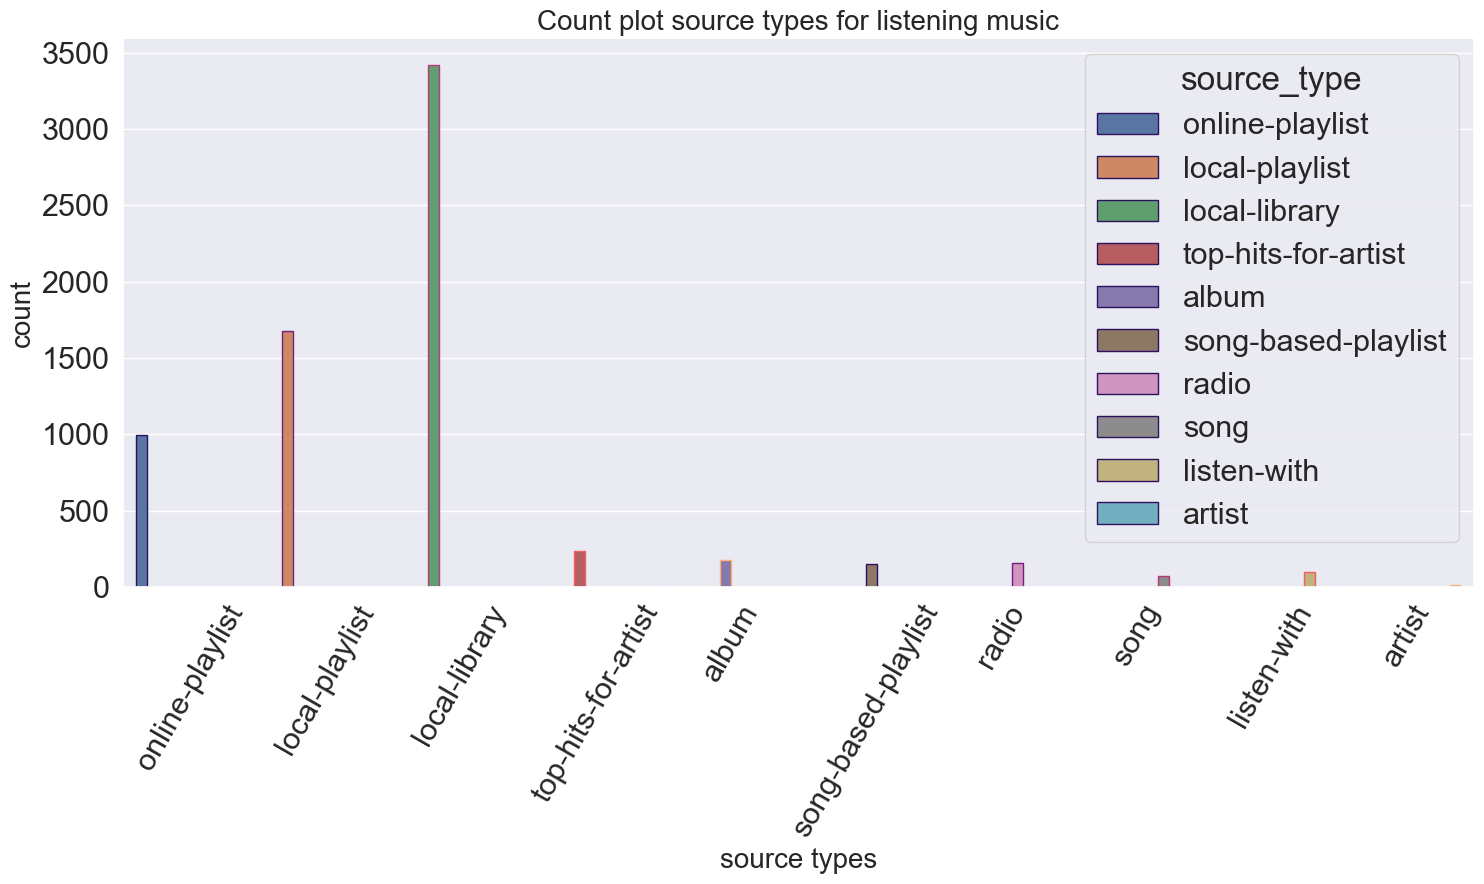

In [78]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=60)
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=60)
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [79]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

# Function to plot histograms for categories

In [80]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 90)
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

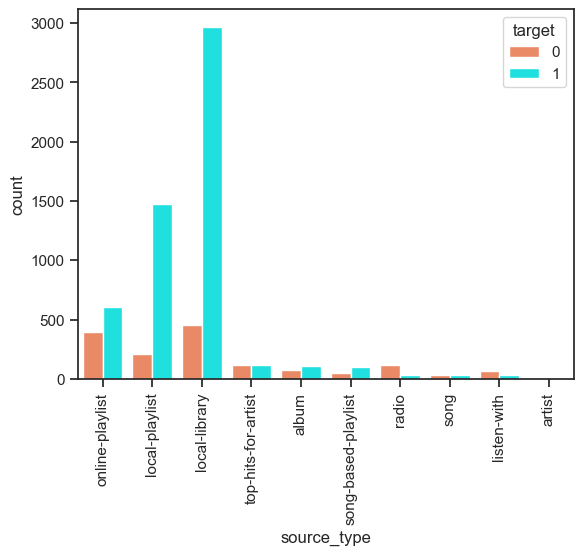

In [81]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

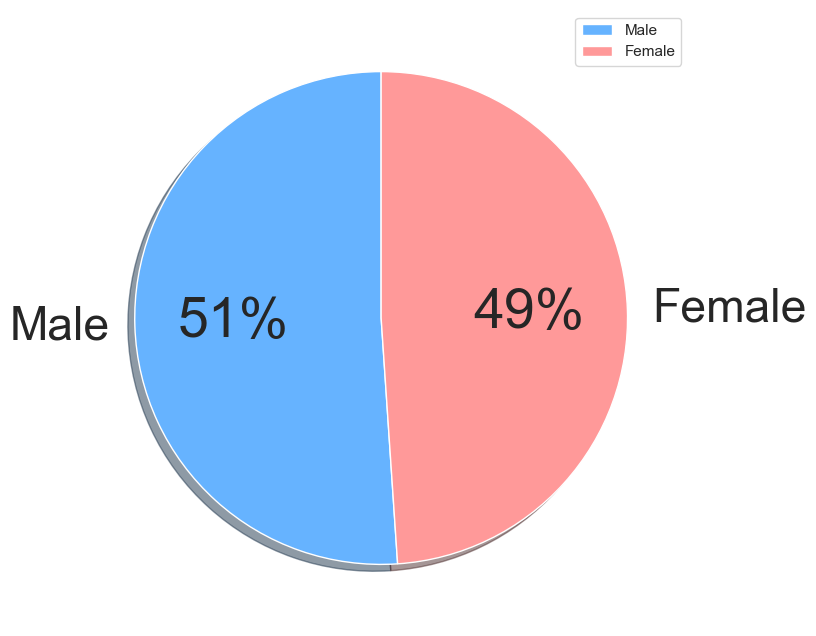

In [82]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

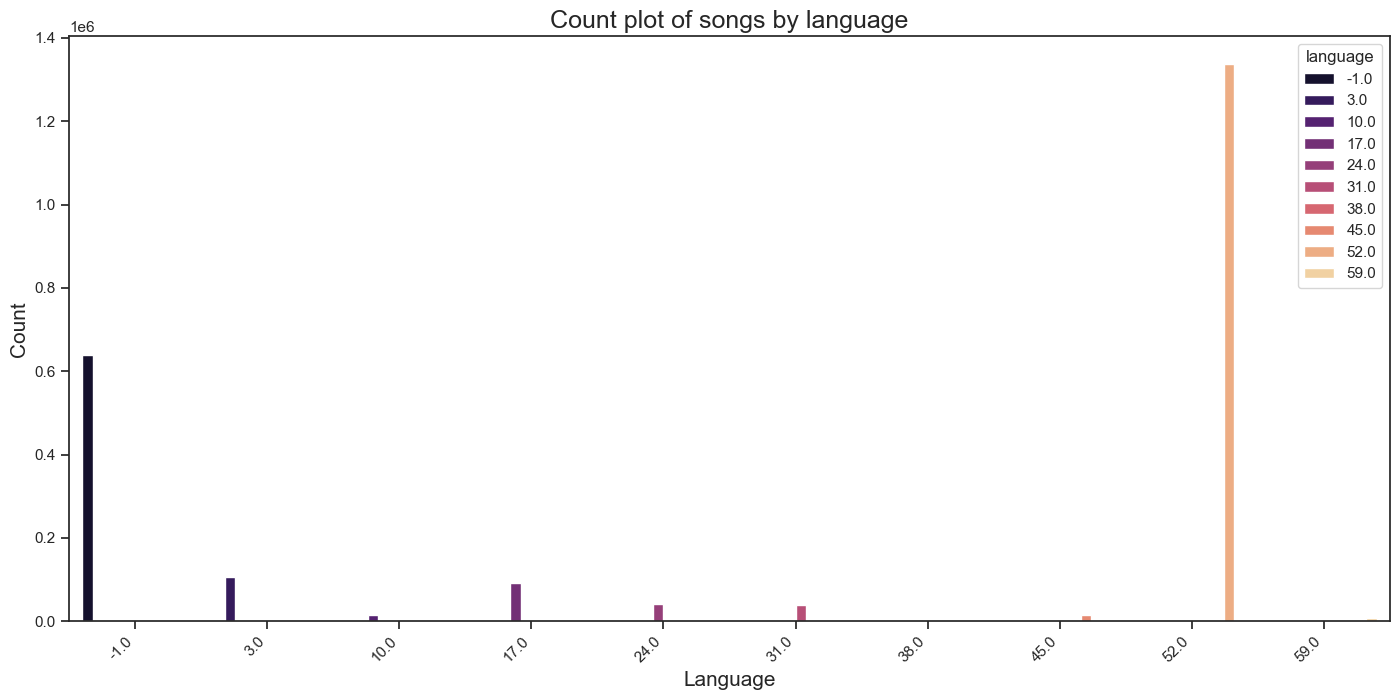

In [83]:
# Increase figure size for better visualization
plt.figure(figsize=(15, 8))

# Correct the usage of countplot
sns.countplot(x='language', data=songs, hue='language', palette='magma')

# Rotate x-ticks for better readability if keeping vertical bars
plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Language', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count plot of songs by language', fontsize=18)

plt.tight_layout()
plt.show()


In [ ]:
count_plot_function(members, 'registered_via')

In [ ]:
count_plot_function(members, 'city')

/var/folders/sf/7w5dp0856nj6ssg731k_dkp80000gn/T/ipykernel_1202/408850655.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(members.registration_init_time,color='orange')


Text(0.5, 1.0, 'PDF for Registration')

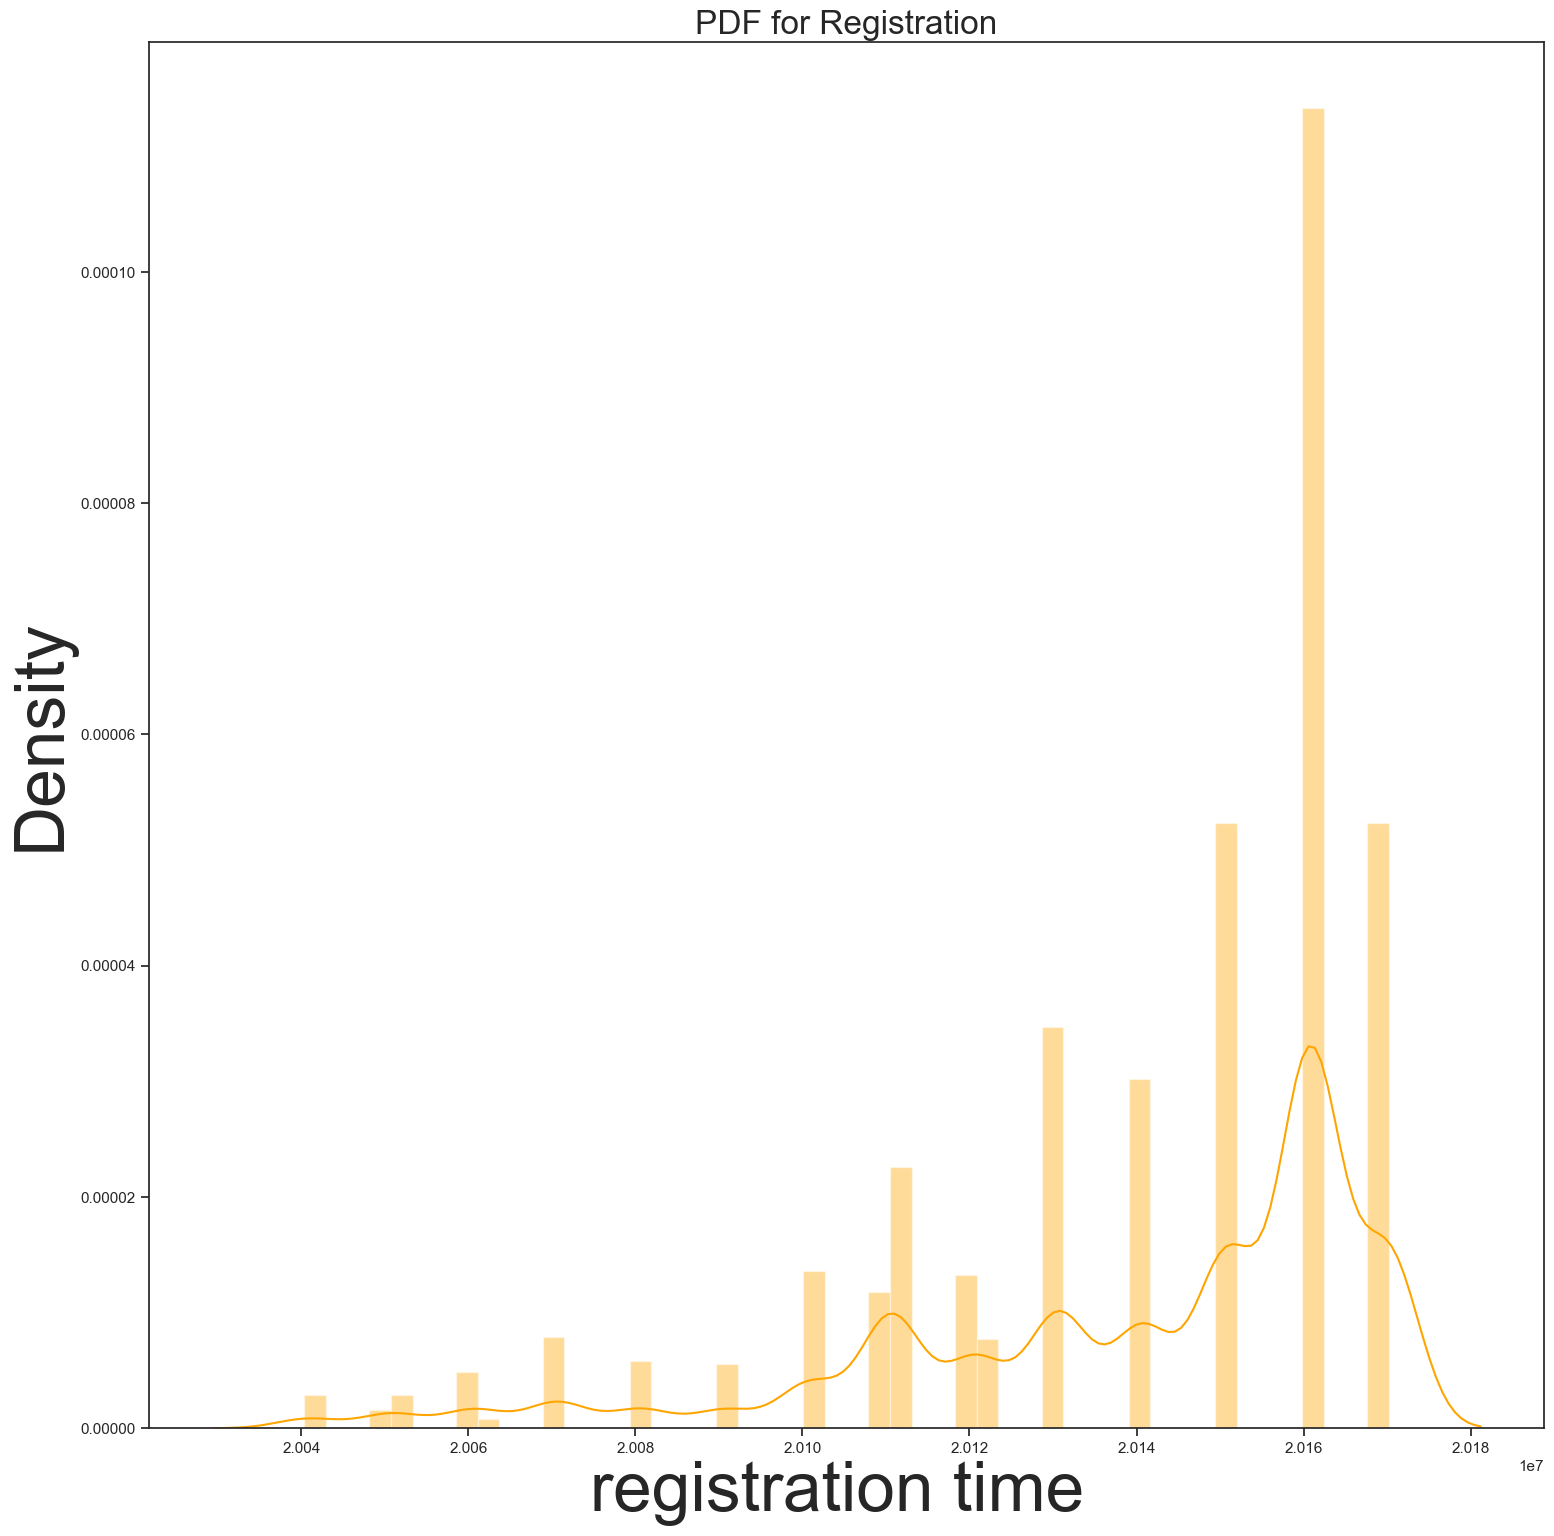

In [84]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

# Function to plot PDF and CDf.

In [ ]:
def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

/var/folders/sf/7w5dp0856nj6ssg731k_dkp80000gn/T/ipykernel_1202/3640508256.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='purple')


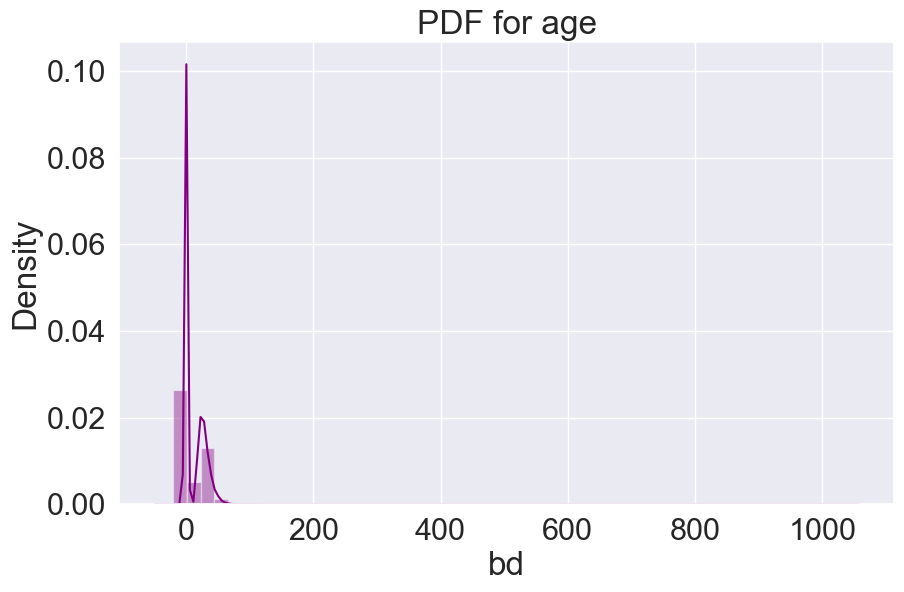

In [85]:
plot_pdf_cdf(members['bd'], False)

In [ ]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [86]:
np.percentile(members['bd'].values, 98)

47.0

# DATA PREPROCESSING AND CLEANING

In [87]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [88]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [89]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [90]:
train = train.fillna(-1)
test = test.fillna(-1)

In [91]:
import gc
del members, songs; gc.collect();

In [92]:
colm = list(train.columns)
colm.remove('target')

In [93]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 108.62it/s]


In [94]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [95]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# MODEL BUILDING

In [96]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

# TRYING OUT BASIC CLASSIFICATION MODELS

In [97]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [99]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 77.10000000000001


In [104]:
import lightgbm as lgb

# Define the parameters
params = {
    'learning_rate': 0.4,
    'objective': 'binary',
    'max_depth': 15,
    'num_leaves': 2**8,
    'metric': 'auc',
    'verbosity': -1  # Suppress detailed logs
}

# Train the model using callbacks for early stopping and logging
model1 = lgb.train(
    params, 
    train_set=d_train, 
    num_boost_round=200, 
    valid_sets=watchlist, 
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(period=10)]
)



Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.97341	valid_1's auc: 0.738668
[20]	training's auc: 0.997965	valid_1's auc: 0.751406
Early stopping, best iteration is:
[15]	training's auc: 0.99009	valid_1's auc: 0.756543


In [105]:
p_test = model1.predict(X_test)

In [109]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 76.500000%


# Thank You